In [4]:
import unicodedata
import sys
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [5]:
import requests

firstPage = "https://squid-game.fandom.com/wikia.php?controller=DiscussionThread&method=getThreads&responseGroup=small&sortDirection=descending&sortKey=creation_date&viewableOnly=true&limit=20&pivot=4400000000000056584&page=0"

pagesToTake = 1

# wikia.php로부터 얻은 url부터 requests 모듈을 통해 json 객체를 생성합니다.
posts = []
link = firstPage
for page in range(0, pagesToTake):
    data = requests.get(link).json()
    
    threads = data["_embedded"]["threads"]
    posts += [ { "title": post["title"], "content": post["rawContent"], "time": post["creationDate"]['epochSecond'] } for post in threads ]
    link = data["_links"]["next"][0]["href"]

for post in posts:
    print("> " + post["title"])
    print(post["content"])
    print(post["time"])
    print("")

> Your favorite random player.

1666125820

> How many oaoaty players are soaoaing?

1666102566

> How good of a character is Oh Il-Nam in YOUR opinion?

1666036576

> Who is this? (#1)
Wrong answers only

1666036421

> Will Ali play Among Us with Mi-nyeo ?

1666019207

> How long will Mi-nyeo play Among Us ?

1665946298

> On a scale of 1-10, how GOOD of a character is Ali Abdul?

1665941323

> Cho Sang-woo is an

1665859653

> Cho Sang-woo is 

1665853730

> On a scale of 1-10, how bad of a character is Cho Sang-woo (1 being not bad, 10 being very bad)

1665842266

> How many times will Mi-nyeo act like 2 animals?

1665840888

> Issue (2)
Hyun-jin seems a female name too, why is 083's actor named Jang Hyun-jin???
1665821378

> Issue
I have changed Hyun Jin's image because someone accidentally added the first image when it was actually considered to be Seo Hyun-jin, here is the real one i added, i fixed it.

1665821231

> Is Seong Gi-hun an Anti-Hero?

1665697286

> On a scale of 1-10

In [7]:
# 2022년 2월 이전의 게시글만 추출합니다.
result = sorted(posts, key=lambda x:x['time'])

leng = []
for i in range(len(result)):
    if result[i]['time'] < 1643677200:
        leng.append(result[i]['time'])

posts = result[:len(leng)]

titles = []
contents = []

for post in posts:
    titles.append(post['title'])
    contents.append(post['content'])

In [8]:
def textEditor(data):
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
    titles_punctuation = [string.translate(punctuation) for string in data]
        
    titles_fixed = []
    special = re.compile(r'[^ A-Za-z0-9+]')
    for i in titles_punctuation:
        titles_fixed.append(special.sub('',i))
        
        
    titles_tokenized = []
    for titles_token in titles_fixed:
        element = titles_token.split(" ")
        for element_token in element:
            if element_token != '':
                titles_tokenized.append(element_token.lower())
        
    stop_words = stopwords.words('english')
    titles_fixed_stopwords = [word for word in titles_tokenized if word not in stop_words] # 불용어 삭제
       
    
    title = []
    for titles in titles_fixed_stopwords:
        if len(titles) > 2:
            title.append(titles)
                
    result = []
    lemmatizer=WordNetLemmatizer()
    for word in title:
        result.append(lemmatizer.lemmatize(word))
        
    text_refined = []
    for i in result:
        text_tagged = pos_tag(word_tokenize(i))
        text_refined.append(text_tagged)
          
    text_refined2 = []
    for i in range(len(text_refined)):
        text_refined2.append(text_refined[i][0])
    return text_refined2

In [9]:
titles = textEditor(titles)

In [11]:
titles

[]

In [10]:
contents = textEditor(contents)

In [10]:
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

NN_stopwords = ['favorite','wiki','player','squid', 'game', 'squidgame', 'spoiler', 'episode','thing','think','didnt','dont','squid','hate', 'game', 'squidgame', 'spoiler', 'episode', 'dont','saddest', 'want', 'woudnt']
JJ_stopwords = ['english', 'ive', 'american', 'red', 'green','likely','due','second','unknown','']

def tag_wordcloud(element, tag):
    tag_list = []
    for i in element:
        if tag in i:
            tag_list.append(i[0])
    
    if tag == 'JJ':
        tag_list = [word for word in tag_list if word not in JJ_stopwords]
    elif tag == 'NN':
        tag_list = [word for word in tag_list if word not in NN_stopwords]

    count = Counter(tag_list)
    print(count)
    
    wc = WordCloud(max_words = 2000, width = 1600, height = 800)
    generate = wc.generate_from_frequencies(count)
    plt.figure(figsize=(18,18))
    plt.imshow(generate, interpolation = 'bilinear')
    wc.to_file(tag+'_fandom.png')

Counter({'character': 84, 'part': 44, 'death': 37, 'page': 30, 'guy': 30, 'season': 27, 'marble': 21, 'gihun': 21, 'guard': 19, 'poll': 19, 'sangwoo': 18, 'post': 18, 'ali': 18, 'team': 17, 'favourite': 16, 'user': 16, 'light': 15, 'seong': 14, 'cho': 14, 'hello': 13, 'vip': 13, 'thought': 12, 'win': 12, 'idea': 12, 'theory': 12, 'abdul': 12, 'hey': 10, 'die': 10, 'version': 10, 'man': 10, 'number': 10, 'category': 10, 'everyone': 9, 'minor': 9, 'meme': 9, 'show': 9, 'scene': 9, 'roblox': 9, 'round': 9, 'war': 9, 'something': 8, 'help': 8, 'video': 8, 'sorry': 8, 'front': 8, 'kang': 8, 'watch': 8, 'female': 8, 'opinion': 8, 'country': 8, 'tug': 8, 'year': 8, 'sang': 7, 'junho': 7, 'saebyeok': 7, 'fanfiction': 7, 'day': 7, 'edit': 6, 'look': 6, 'way': 6, 'anyone': 6, 'woo': 6, 'time': 6, 'hwang': 6, 'fan': 6, 'found': 6, 'doll': 6, 'shape': 6, 'news': 6, 'please': 6, 'quit': 6, 'name': 6, 'top': 6, 'evil': 6, 'voting': 6, 'cartoon': 6, 'chance': 6, 'quiz': 5, 'join': 5, 'fight': 5, 'ran

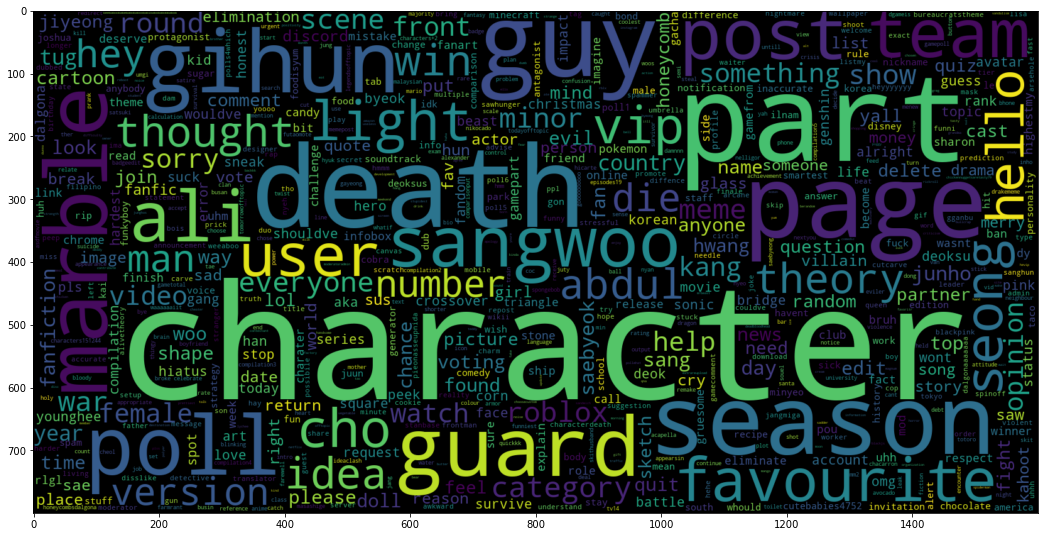

In [11]:
tag_wordcloud(titles, 'NN')